In [25]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
raw_df = pd.read_csv('/content/lyrics_by_year_1964_2023.csv', encoding='utf-8') # 1964년부터 2023년 까지 멜론 순위권 노래 가사 데이터 불러오기
df = raw_df.sort_values(by=['year', 'id']).reset_index(drop=True)  # year과 id 기준으로 정렬
lyrics_all_df = df.copy()   # 작업용 Dataframe 생성
lyrics_all_df

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [27]:
pip install konlpy  # 한국어 정보처리를 위한 파이썬 패키지 설치


In [28]:
from collections import Counter
import konlpy
from konlpy.tag import Hannanum, Okt
import re

h = Hannanum()    # 형태소 분석을 위해 Hannaum 클래스 초기화
okt = Okt()       # 형태소 분석을 위해 okt 클래스 초기화

def get_nouns(text):        # 명사 추출 함수
    return h.nouns(text)

def get_okt(text):          # okt 형태소 분석기 사용
    # 줄바꿈을 공백으로 변환,  형태소 정규화 및 원형화
    return okt.pos(text.replace('\n', ' '), norm=True, stem=True)

def filter_unicode(text, unicode_range):  # 텍스트 필터링
    start, end = unicode_range
    return ''.join(filter(lambda c: start <= c <= end, text))

#----------------------------------------------------------------------------------------
def to_single_space(text):                # 공백이 두 개 이상일 경우 한 개로 바꿈
    return re.sub('\s{2,}', ' ', text).strip()
#----------------------------------------------------------------------------------------

def filter_language_raw(text, lang):
    if lang == 'kr':
        return re.sub('[^\uac00-\ud7a3\s]+', '', text)
    return re.sub('[^a-zA-Z\s]+', '', text)

def filter_language(text, lang = 'kr'):
    return to_single_space(filter_language_raw(text, lang))

In [97]:

unique_songs_all = lyrics_all_df.drop_duplicates(subset=['id'])   # id를 기준으로 중복 제거
unique_songs_all

,id,year,title,singer,lyric,x_rated
0,467355,1964,마도로스 부기,백야성,항구의 일번지 부기우기 일번지\n그라스를 채워다오 부기우기 아가씨\n고동이 슬피울면...,False
1,467498,1964,빨간구두 아가씨,남일해,솔솔솔 오솔길에 빨간구두 아가씨\n똑똑똑 구두소리 어딜 가시나\n한번쯤 뒤돌아 볼만...,False
2,992864,1964,아메리칸 마도로스,고봉산,무역선 오고가는 부산 항구 제2부두\n죄많은 마도로스 이별이 야속트라\n닷줄을 감으...,False
3,1002782,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을\n내 가슴 도려내는 아픔에 겨워\n얼마나 울었던가 동백아...,False
4,1003023,1964,눈물의 연평도,최숙자,조기를 담뿍잡아\n기폭을 올리고\n온다던 그배는\n어이하여 아니오나\n수평선 바라보...,False
...,...,...,...,...,...,...
4661,36635522,2023,ETA,NewJeans,낭비하지 마 네 시간은 은행\n서둘러서 정리해 걔는 real bad\n받아주면 안돼...,False
4662,36681074,2023,Fast Forward,전소미,I’m your future lover\n타락한 밤 너의 ruler\n영화 속 달콤...,False
4663,36713849,2023,Love Lee,AKMU 악뮤,You know\n내 스타일이 아닌 음악을 들어도\nYou know\n좋아하지 않는...,False
4664,36713850,2023,후라이의 꿈,AKMU 악뮤,저 거위도 벽을 넘어 하늘을 날을 거라고\n달팽이도 넓고 거친 바다 끝에 꿈을 둔다...,False


In [30]:
counter_kr = Counter()
lyrics = unique_songs_all['lyric']

for lyric in lyrics:
    l_ko = filter_language(str(lyric), 'kr')  # 한국어만 추출
    sentence = [f"{word}_{ty}_kr" for word, ty in get_okt(l_ko)]  # 형태소 분석 (단어별로 분리)
    c = Counter(sentence)
    counter_kr += c         # 단어 빈도 정보 저장
    del c

print(counter_kr)


  0%|          | 0/4220 [00:00<?, ?it/s]

Counter({'하다_Verb_kr': 20058, '을_Josa_kr': 14425, '에_Josa_kr': 13592, '이_Josa_kr': 13162, '너_Noun_kr': 12089, '내_Noun_kr': 11940, '사랑_Noun_kr': 11112, '가_Josa_kr': 10724, '의_Josa_kr': 10307, '나_Noun_kr': 10181, '없다_Adjective_kr': 7812, '있다_Adjective_kr': 7550, '를_Josa_kr': 7278, '는_Josa_kr': 7054, '은_Josa_kr': 6909, '도_Josa_kr': 6260, '보다_Verb_kr': 6171, '그대_Noun_kr': 5868, '그_Noun_kr': 5809, '난_Noun_kr': 5645, '말_Noun_kr': 5530, '날_Noun_kr': 5445, '수_Noun_kr': 3936, '않다_Verb_kr': 3764, '들_Suffix_kr': 3732, '널_Noun_kr': 3621, '만_Josa_kr': 3461, '것_Noun_kr': 3338, '우리_Noun_kr': 3156, '나르다_Verb_kr': 3089, '이_Noun_kr': 2977, '마음_Noun_kr': 2911, '사람_Noun_kr': 2830, '더_Noun_kr': 2783, '네_Noun_kr': 2648, '이_Determiner_kr': 2607, '같다_Adjective_kr': 2582, '다_Adverb_kr': 2562, '모르다_Verb_kr': 2537, '가다_Verb_kr': 2526, '잊다_Verb_kr': 2499, '다시_Noun_kr': 2489, '그렇다_Adjective_kr': 2489, '버리다_Verb_kr': 2441, '싶다_Verb_kr': 2435, '내다_Verb_kr': 2387, '처럼_Josa_kr': 2366, '니_Noun_kr': 2357, '오다_Verb_kr': 

In [31]:
import nltk                                             # 자연어 처리 라이브러리
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize                 # 비슷한 프로젝트들의 표제어 추출 로직 참조

nltk.download('popular')                                # 자연어 처리

lemmatizer = WordNetLemmatizer()                        # 표제어 추출
stemmer = PorterStemmer()                               # 어간 추출

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [33]:
def complete_word(words):       # 축약형 단어 처리
    def complete(word):
        if word == 'I': return ['I']
        if word == 'Im': return ['I', 'am']
        if word == 'Ill': return ['I', 'will']
        return [word.lower()]
    r = []
    for w in words:
        r += complete(w)
    return r

counter_en = Counter()

for l in lyrics:
    l = '' if type(l) != str else l     # 가사가 문자열이 아닌 경우
    sentence = filter_language(l, 'en') # 영어 가사만 필터링
    if len(sentence) < 1:               # 가사가 비어있을 경우
        continue
    words = complete_word(sentence.split()) # 단어 확장 및 처
    c = Counter([f"{lemmatizer.lemmatize(word, 'v')}_Eng_en" for word in words])  # 표제어 처리
    counter_en += c                     # 단어 빈도 정보 저장
    del c

print(counter_en)

Counter({'I_Eng_en': 5367, 'you_Eng_en': 4367, 'be_Eng_en': 3321, 'oh_Eng_en': 2858, 'me_Eng_en': 2477, 'love_Eng_en': 2050, 'my_Eng_en': 2028, 'it_Eng_en': 1780, 'baby_Eng_en': 1654, 'the_Eng_en': 1640, 'a_Eng_en': 1364, 'yeah_Eng_en': 1216, 'to_Eng_en': 1146, 'la_Eng_en': 1004, 'on_Eng_en': 964, 'and_Eng_en': 939, 'dont_Eng_en': 917, 'like_Eng_en': 908, 'so_Eng_en': 900, 'get_Eng_en': 894, 'up_Eng_en': 852, 'no_Eng_en': 850, 'in_Eng_en': 811, 'come_Eng_en': 796, 'know_Eng_en': 796, 'go_Eng_en': 764, 'we_Eng_en': 718, 'your_Eng_en': 680, 'uh_Eng_en': 660, 'do_Eng_en': 659, 'that_Eng_en': 649, 'hey_Eng_en': 638, 'girl_Eng_en': 616, 'let_Eng_en': 588, 'now_Eng_en': 564, 'ah_Eng_en': 564, 'just_Eng_en': 539, 'say_Eng_en': 537, 'its_Eng_en': 534, 'boy_Eng_en': 520, 'wanna_Eng_en': 500, 'one_Eng_en': 488, 'this_Eng_en': 484, 'what_Eng_en': 460, 'u_Eng_en': 451, 'for_Eng_en': 450, 'all_Eng_en': 417, 'back_Eng_en': 411, 'make_Eng_en': 403, 'with_Eng_en': 400, 'feel_Eng_en': 400, 'want_Eng_en

In [34]:
count_pairs = []
counter = counter_kr + counter_en   # 한국어와 영어 단어 빈도 정보 합산

for key, count in counter.items():
    word, kind, lang = key.split('_')               # 단어, 품사, 언어 분리
    count_pairs.append((word, kind, count, lang))   # 튜플로 저장

count_df = pd.DataFrame(count_pairs, columns=['word', 'type', 'count', 'language'])
count_df = count_df.sort_values(by=['count', 'type'], ascending=[False, True])  # 빈도 기준 내림차순, 품사 기준 오름차순

,word,type,count,language
31,하다,Verb,20058,kr
26,을,Josa,14425,kr
20,에,Josa,13592,kr
10,이,Josa,13162,kr
671,너,Noun,12089,kr
...,...,...,...,...
12907,힐끗대다,Verb,1,kr
12928,대물리다,Verb,1,kr
12955,들이밀다,Verb,1,kr
8771,쵸,VerbPrefix,1,kr


In [35]:
count_df[count_df['language'] == 'en']  # 영어 단어


,word,type,count,language
13087,I,Eng,5367,en
13036,you,Eng,4367,en
13001,be,Eng,3321,en
13121,oh,Eng,2858,en
13006,me,Eng,2477,en
...,...,...,...,...
16541,veggies,Eng,1,en
16542,lap,Eng,1,en
16543,nothings,Eng,1,en
16544,dynamic,Eng,1,en


In [37]:
# 결과 저장
count_df.to_csv('lyrics_words_count.csv', encoding='utf-8', index=False)

In [50]:
# 폰트 설치
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import rc

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False


In [41]:
def get_words_counts(df) -> dict:
    d = df[['word', 'count']]       # 단어와 빈도만 포함된 DataFrame
    d.index = d['word']             # 단어를 인덱스로 설정
    d = d.drop(['word'], axis=1)    # 단어 컬럼 제거
    return d.to_dict()['count']     # 딕셔너리 형식으로 반환

In [43]:
count_df['type'].unique()
is_kr = count_df['language'] == 'kr'      # 한국어
is_en = count_df['language'] == 'en'      # 영어
is_noun = count_df['type'] == 'Noun'      # 명사
is_verb = count_df['type'] == 'Verb'      # 동사
is_adj = count_df['type'] == 'Adjective'  # 형용사


In [46]:
import numpy as np

rows = []
years = sorted(lyrics_all_df.year.unique())

for year in years:
    df = lyrics_all_df[lyrics_all_df.year == year].copy()   # 가사의 연도별로 고유 값 추출, 오름차순 정렬
    kr_wc, en_wc, etc = [], [], []          # 한국어 단어, 영어 단어, 기타
    kr_wc_r, en_wc_r, etc_r = [], [], []    # 전체 단어 수에 대한 비율
    for l in df['lyric']:
        l = l if type(l) is str else ''
        l = l.replace('\n', ' ').strip()
        k = len(filter_language(l, 'kr').split())   # 한국어 필터링
        e = len(filter_language(l, 'en').split())   # 영어 필터링
        z = len(l.replace(' ', '')) - k - e         # 기타
        total = k + e + z
        kr_wc.append(k)
        kr_wc_r.append(k / total if total > 0 else 0)   # 비율 계산
        en_wc.append(e)
        en_wc_r.append(e / total if total > 0 else 0)   # 비율 계산
        etc.append(z)
        etc_r.append(z / total if total > 0 else 0)     # 비율 계산

    rows.append([
        sum(kr_wc), sum(en_wc), sum(etc),                   # 단어 총합
        np.mean(kr_wc_r), np.mean(en_wc_r), np.mean(etc_r)  # 비율 평균
    ])

rows = np.array(rows)

In [47]:
cnt_df = pd.DataFrame(rows, columns=[
    'kr_words', 'en_words', 'etc_words',                    # 한국어 단어, 영어 단어, 기타
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'   # 전체 단어 수의 대한 비율
])
cnt_df['year'] = years
for col in ['kr_words', 'en_words', 'etc_words']:
    cnt_df[col] = cnt_df[col].astype(int)
cnt_df = cnt_df[[                                           # 연도별
    'year',
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'
]]

In [48]:
ratio_df = cnt_df[['year']].copy()
ratio_df['kr_en'] = cnt_df['kr_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])  # 한국어 비율 계산
ratio_df['en_kr'] = cnt_df['en_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])  # 영어 비율 계산

,year,kr_en,en_kr
0,1964,1.000000,0.000000
1,1965,1.000000,0.000000
2,1966,1.000000,0.000000
3,1967,1.000000,0.000000
4,1968,0.978713,0.021287
5,1969,1.000000,0.000000
6,1970,1.000000,0.000000
7,1971,0.985618,0.014382
8,1972,1.000000,0.000000
9,1973,1.000000,0.000000


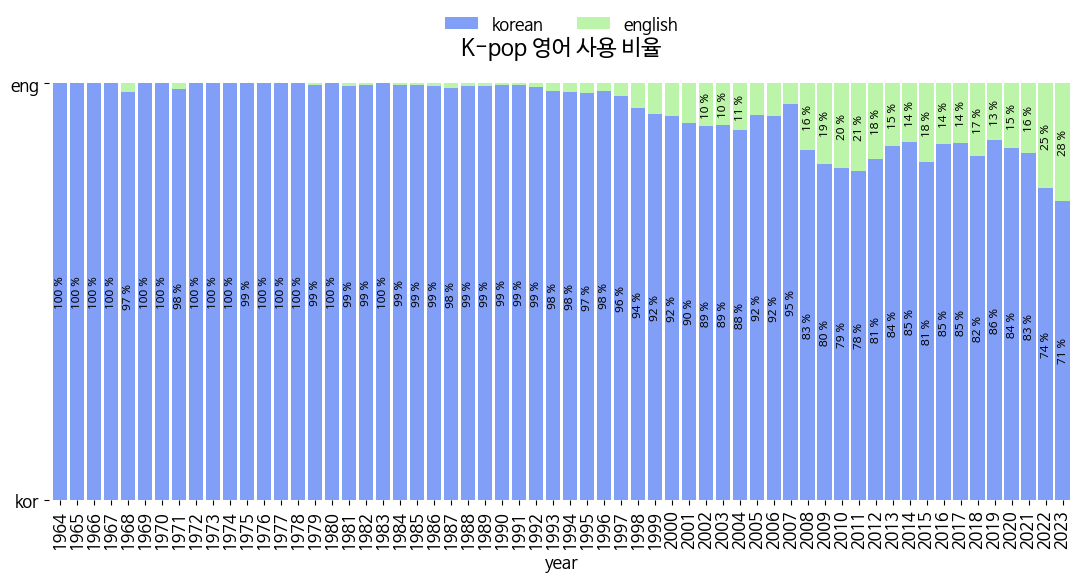

In [82]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=[11, 6])
x_var, y_var = "kr_en", "en_kr"
df_grouped = ratio_df[[x_var, y_var]]
df_grouped.columns = ['korean', 'english']
df_grouped.plot.bar(stacked=True, width=0.85, ax=ax, color=['#819FF7', '#BCF5A9'])  # 특정 색상으로 설정
plt.xticks(ticks=range(len(df_grouped)), labels=ratio_df['year'])
plt.yticks(ticks=[0, 1], labels=['kor', 'eng'])
plt.legend(
    bbox_to_anchor=(0.5, 1.05),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                rotation=90,
                color="black",
                fontsize="x-small",
            )
        cumulative += element
plt.xlabel('year')
plt.title('K-pop 영어 사용 비율', fontsize=16, color='black')
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()

In [99]:
print(sorted(unique_songs_all.year.unique()))


[1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [100]:

import ipywidgets as widgets
from IPython.display import display
# 연도별로 가장 많이 사용된 단어를 계산하고 저장
years = sorted(unique_songs_all.year.unique())
top_words_per_year_kr = {}
top_words_per_year_en = {}

for year in years:
    df_year = unique_songs_all[unique_songs_all.year == year]

    # 한국어 단어 처리
    kr_words = Counter()
    for lyric in df_year['lyric']:
        lyric = str(lyric).replace('\n', ' ').strip() if isinstance(lyric, str) else ''
        kr_words.update(filter_language(lyric, 'kr').split())

    # 영어 단어 처리
    en_words = Counter()
    for lyric in df_year['lyric']:
        lyric = str(lyric).replace('\n', ' ').strip() if isinstance(lyric, str) else ''
        en_words.update(filter_language(lyric, 'en').split())

    # 상위 10개 단어 추출
    top_words_per_year_kr[year] = kr_words.most_common(10)
    top_words_per_year_en[year] = en_words.most_common(10)

# 연도 선택 위젯 생성
year_widget = widgets.Dropdown(
    options=years,
    description='Select Year:',
    disabled=False
)

# 선택된 연도에 따라 그래프를 동적으로 업데이트하는 함수
def update_graph(year):
    # 한국어 단어 시각화
    fig, axs = plt.subplots(1, 1, figsize=(12, 6))
    top_kr_words = pd.DataFrame(top_words_per_year_kr[year], columns=['word', 'count'])
    sns.barplot(data=top_kr_words, x='count', y='word', ax=axs, palette='Blues_r')
    axs.set_title(f"Top 10 Korean Words in {year}")
    axs.set_xlabel("Count")
    axs.set_ylabel("Words")
    axs.tick_params(axis="y", labelsize=8)

    plt.tight_layout()
    plt.show()

    # 영어 단어 시각화
    fig, axs = plt.subplots(1, 1, figsize=(12, 6))
    top_en_words = pd.DataFrame(top_words_per_year_en[year], columns=['word', 'count'])
    sns.barplot(data=top_en_words, x='count', y='word', ax=axs, palette='Oranges_r')
    axs.set_title(f"Top 10 English Words in {year}")
    axs.set_xlabel("Count")
    axs.set_ylabel("Words")
    axs.tick_params(axis="y", labelsize=8)

    plt.tight_layout()
    plt.show()

# 위젯과 함수를 연결하여 화면에 표시
widgets.interactive(update_graph, year=year_widget)

interactive(children=(Dropdown(description='Select Year:', options=(1964, 1965, 1966, 1967, 1968, 1969, 1970, …